<a href="https://colab.research.google.com/github/Madusha27301/codealpha_tasks/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 4 — Sentiment Analysis**

## Step 1: Load the dataset

In [1]:
!pip install kagglehub[pandas-datasets]

import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("kritanjalijain/amazon-reviews")
print("Dataset downloaded to:", path)
print("Files available:", os.listdir(path))

df = pd.read_csv(path + "/train.csv")

df.head()

100%|██████████| 1.29G/1.29G [00:08<00:00, 156MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/kritanjalijain/amazon-reviews/versions/2
Files available: ['amazon_review_polarity_csv.tgz', 'train.csv', 'test.csv']


,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


## STEP 2: Rename Columns

In [9]:
df.columns = ["label", "title", "review"]
df.head()

,label,title,review
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


## Step 3: Convert Labels

In [10]:
df['sentiment'] = df['label'].map({1: 'positive', 2: 'negative'})
df.head()

,label,title,review,sentiment
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,negative
1,2,Amazing!,This soundtrack is my favorite music of all ti...,negative
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,negative
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",negative
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...,negative


## Step 4: Text Cleaning

In [11]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"<.*?>", "", text)    # remove HTML tags
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()


,label,title,review,sentiment,cleaned_review
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,negative,im reading a lot of reviews saying that this i...
1,2,Amazing!,This soundtrack is my favorite music of all ti...,negative,this soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,negative,i truly like this soundtrack and i enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",negative,if youve played the game you know how divine t...
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...,negative,i am quite sure any of you actually taking the...


## Step 5: Sentiment Analysis (VADER)

In [12]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return "positive"
    elif score['compound'] < -0.05:
        return "negative"
    else:
        return "neutral"

df['vader_sentiment'] = df['cleaned_review'].apply(vader_sentiment)
df[['review','vader_sentiment']].head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


,review,vader_sentiment
0,I'm reading a lot of reviews saying that this ...,positive
1,This soundtrack is my favorite music of all ti...,positive
2,I truly like this soundtrack and I enjoy video...,positive
3,"If you've played the game, you know how divine...",positive
4,I am quite sure any of you actually taking the...,positive


## Step 6: Emotion Detection

In [15]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
from nrclex import NRCLex

def get_emotions(text):
    emotion = NRCLex(text)
    return emotion.top_emotions

df['emotions'] = df['cleaned_review'].apply(get_emotions)
df[['review','emotions']].head()


,review,emotions
0,I'm reading a lot of reviews saying that this ...,"[(positive, 0.2916666666666667)]"
1,This soundtrack is my favorite music of all ti...,"[(positive, 0.21153846153846154)]"
2,I truly like this soundtrack and I enjoy video...,"[(positive, 0.2)]"
3,"If you've played the game, you know how divine...","[(positive, 0.17647058823529413)]"
4,I am quite sure any of you actually taking the...,"[(positive, 0.25925925925925924)]"


## Step 7: Sentiment Distribution

In [18]:
df['vader_sentiment'].value_counts()


,count
vader_sentiment,
positive,2527987
negative,934995
neutral,137017


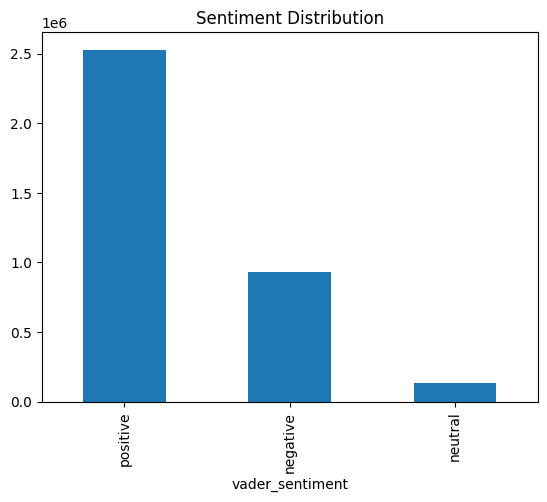

In [19]:
import matplotlib.pyplot as plt

df['vader_sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.show()


## Step 8: Emotion Frequency

In [20]:
from collections import Counter

all_emotions = Counter()

for row in df['emotions']:
    for emotion, value in row:
        all_emotions[emotion] += value

all_emotions

Counter({'positive': 784948.6319632787,
         'joy': 77511.5322824298,
         'anticipation': 155599.03938426424,
         'negative': 267595.5938898669,
         'disgust': 23580.435700460905,
         'sadness': 49761.48100885941,
         'trust': 165728.52091648878,
         'surprise': 29510.51817690347,
         'fear': 42690.9205784569,
         'anger': 31384.60545684534,
         'anticip': 0.0})